# Aim
Check whether DECD param give consistent fidelities with Qutip Simulations

# Imports

In [1]:
import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')
#sys.path.append('C:\\_Lib\\python\\ECD_control')
#sys.path.append('C:\\_Lib\\python')

In [2]:
# for param file 
#%%
# note: timestamp can't use "/" character for h5 saving.
TIMESTAMP_FORMAT = "%Y-%m-%d %H:%M:%S"
END_OPT_STRING = "\n" + "=" * 60 + "\n"
import numpy as np
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # supress warnings
import h5py

# print(
#     "\nNeed tf version 2.3.0 or later. Using tensorflow version: "
#     + tf.__version__
#     + "\n"
# )
import ECD_control.ECD_optimization.tf_quantum as tfq
from ECD_control.ECD_optimization.visualization import VisualizationMixin
import qutip as qt
import datetime
import time

In [3]:
# for pulse file
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
from scipy.optimize import fmin



# Finding Param

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from DECD_param import FixedBatchOptimizer as BO
from qutip import *

In [28]:
N1 = 12
N2 = 12

In [6]:
# # #Initial oscillator state.
# # Fock1 = 0
# # Fock2= 1
# # psi_i1 = qt.basis(N1,Fock1) #initial state
# # psi_i2 = qt.basis(N2,Fock2)
# # initial1 = qt.tensor(basis(2,0), psi_i1, psi_i2)

# # #Target
# # Fock1 = 1
# # Fock2= 0
# # psi_t1 = qt.basis(N1,Fock1) #target state
# # psi_t2 = qt.basis(N2,Fock2)
# # target1 = qt.tensor(basis(2,0), psi_t1, psi_t2)
# # #-------------------------------------------------------
# # #Second state 
# # #Initial oscillator state.
# # Fock1 = 0
# # Fock2= 2
# # psi_i1 = qt.basis(N1,Fock1) #initial state
# # psi_i2 = qt.basis(N2,Fock2)
# # initial2 = qt.tensor(basis(2,0), psi_i1, psi_i2)


# # #Target
# # Fock1 = 2
# # Fock2= 0
# psi_t1 = qt.basis(N1,Fock1) #target state
# psi_t2 = qt.basis(N2,Fock2)
# target2 = qt.tensor(basis(2,0), psi_t1, psi_t2)

# #-------------------------FUll list
# initial = [initial1, initial2]
# target = [target1, target2]

In [7]:


# #Optimization of ECD Circuit parameters (betas, gammas, phis, and thetas)
# #the optimization options
# opt_params = {
# 'N_blocks' : 10, #circuit depth
# 'N_multistart' : 20, #Batch size (number of circuit optimizations to run in parallel)
# 'epochs' : 100, #number of epochs before termination
# 'epoch_size' : 20, #number of adam steps per epoch
# 'learning_rate' : 0.01, #adam learning rate
# 'term_fid' : 0.999, #terminal fidelitiy
# 'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
# 'beta_scale' : 3.0, #maximum |beta| for random initialization
# 'gamma_scale' : 3.0, #maximum |gamma| for random initialization
# 'N_cav1': N1, #number of levels in mode 1
# 'N_cav2': N2, #number of levels in mode 2
# 'initial_states' : initial, #qubit tensor oscillator, start in |g> |0>
# 'target_states' : target, #end in |e> |target>.
# #"initial_params": init_params,
# 'name' : 'Fock1 %d' % Fock1, #name for printing and saving
# 'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
# }



In [8]:
# opt = BO(**opt_params)
# opt.print_info()

In [9]:
# opt.optimize()

In [10]:
# saving angles 
# betas = opt.best_circuit()['betas']
# gammas = opt.best_circuit()['gammas']
# phis = opt.best_circuit()['phis']
# thetas = opt.best_circuit()['thetas']
# etas = opt.best_circuit()['etas']
# params = [np.real(betas), np.imag(betas), np.real(gammas), np.imag(gammas), phis, thetas, etas]
# for i in range(len(params)):
#     params[i] = [float(k) for k in params[i]]

# fname = 'Test_01_10_May20.txt'
# a_file = open(fname, "w")
# np.savetxt(a_file, params)
# a_file.close()

In [11]:
import pandas as pd

In [12]:
filename = "Qutip_Inconsistency2.csv"
df = pd.read_csv(filename)
df

,truncation,levels,exact fidelity,bo_fidelity,qutip fidelity,betas_r,betas_i,gammas_r,gammas_i,phis,thetas
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,2.0,0.135335,0.135344,0.018307,"[-1.0317507, 2.9311693]","[1.1929481, -0.56659055]","[0.3312503, -2.2737894]","[-0.57649285, 1.0524526]","[0.0, -1.4943601]","[0.0, 0.0]"
2,10.0,4.0,0.482266,0.482269,0.232298,"[1.1070973, -0.593497, -0.6090256, -9.370529e-06]","[-1.4047765, -0.4836414, -0.5550839, -6.041329...","[-0.68757117, 0.6610603, 0.8769486, -5.8338737...","[0.45436478, -0.38620776, 1.5588896, 3.338485e...","[0.0, 1.5708163, -1.5707749, 2.2888184e-05]","[-1.5707982, 1.5483696, 1.5932214, 1.5707967]"
3,10.0,6.0,0.963144,0.963157,0.923634,"[-3.5486182e-06, 6.1015357e-06, 0.31787023, -0...","[2.0439791e-05, 1.4551485e-06, -1.533964, -0.2...","[-0.5473627, -0.55472666, 1.3100947, -9.317979...","[0.35816807, -0.84777415, -0.8589938, -1.20120...","[0.0, 1.5708826, -1.5708811, 1.5708792, -1.570...","[-1.5707266, -1.5712142, 1.5712464, 1.5707443,..."
4,10.0,8.0,0.019519,0.995003,0.000459,"[-0.62175345, 0.40788835, -2.050283, -2.112606...","[4.563371, 0.059844542, -1.0031503, 1.295825, ...","[0.8153264, -3.5229461, -1.3499558, 0.27291903...","[-2.7358968, 0.025204692, 0.08491416, -0.31146...","[0.0, -0.11584687, 0.87533975, -1.6313862, 2.9...","[-2.3841858e-07, 3.1415923, -2.3841858e-07, -2..."
5,10.0,10.0,0.199382,0.995748,0.048977,"[0.5657178, 0.120955236, -0.8002235, 3.744708,...","[3.6579838, 0.1905279, 0.26088572, -0.6374204,...","[2.869837, 1.1018021, 1.6426775, -0.36613768, ...","[0.5722848, 0.2747569, -0.7523706, -0.42896155...","[0.0, -0.342865, -0.08286691, 2.3706229, -1.54...","[-3.1415083, -0.0023593903, -3.1415718, 3.1392..."
6,10.0,12.0,0.246391,0.995901,0.055253,"[-1.2044681, 0.91682416, -0.85643494, 2.124685...","[3.2179544, -0.8495686, 0.9158082, 1.4091295, ...","[-1.4497906, 0.0004783259, 8.062313e-05, -0.42...","[0.6165838, -0.0047156163, -0.0020830766, -1.7...","[0.0, 0.20703363, 0.6258724, 3.1213539, -2.391...","[-3.1401072, -2.9240837, 0.0659225, 0.20694208..."
7,12.0,2.0,0.135335,0.135335,0.018284,"[-2.7481567e-08, 1.321242]","[1.9210117e-06, 1.5014404]","[-0.08736417, 1.808087]","[0.19059184, 0.828765]","[0.0, -2.7230406]","[-2.3067772, -2.3067782]"
8,12.0,4.0,0.541341,0.541340,0.292697,"[-1.74547, 0.24210438, 2.8462767e-07, -3.89350...","[0.5482304, 0.7708185, 1.0167635e-06, -6.49253...","[1.3335051e-07, -0.10062261, -1.8152975, 1.977...","[1.0126448e-06, -0.80165505, 0.22785027, 2.462...","[0.0, -1.5708115, -1.5708153, 3.1415756]","[-1.5707966, 1.5707963, 1.5707963, -1.5707965]"
9,12.0,6.0,0.963145,0.963140,0.925825,"[2.7020184e-05, -8.603938e-06, 1.002538, -0.77...","[1.0101796e-05, -4.1652245e-05, -1.2037792, -0...","[0.2590281, -0.9302451, -0.6200921, 2.2473418e...","[0.6006396, 0.40117192, -1.4385802, -6.52809e-...","[0.0, 1.5707977, -1.5707996, -1.5707923, -1.57...","[1.5707943, 1.5707147, -1.5707211, 1.5707877, ..."


In [18]:
df = df.drop([0+ i for i in range(12)])
df = df.drop([13+i for i in range(3)])

In [19]:
df

,truncation,levels,exact fidelity,bo_fidelity,qutip fidelity,betas_r,betas_i,gammas_r,gammas_i,phis,thetas
12,12.0,12.0,0.036612,0.995953,0.001199,"[-0.05475189, -1.3308761, -1.6552757, -0.05999...","[-0.0067101917, 1.9116861, 2.9317482, 0.722263...","[2.1021276, 2.316999, -1.9998033, -0.3607344, ...","[1.9968309, 1.2872226, 0.056321733, 1.2806364,...","[0.0, -0.43595767, -0.563288, 1.3773863, -1.45...","[-3.141456, 0.00024986267, -0.00070238113, -4...."


In [22]:
import ast
param_df = df
k = 12
betas_r = ast.literal_eval(param_df['betas_r'][k])
betas_i = ast.literal_eval(param_df['betas_i'][k])
gammas_r = ast.literal_eval(param_df['gammas_r'][k])
gammas_i = ast.literal_eval(param_df['gammas_i'][k])

betas = np.asarray([complex(betas_r[l], betas_i[l]) for l in range(len(betas_r))] )
gammas = np.asarray([complex(gammas_r[l], gammas_i[l]) for l in range(len(gammas_r))] )
#print(betas)

phis = np.asarray(ast.literal_eval(param_df['phis'][k]))
thetas = np.asarray(ast.literal_eval(param_df['thetas'][k]))
#print(phis)
bo_fid = float(param_df['bo_fidelity'][k])
ex_fid = float(param_df['exact fidelity'][k])

# Calculator

In [23]:
from qutip import *

In [45]:
def mod_disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator using baken campbell formula
    '''
    pauli_like_x = (create(n_c) + destroy(n_c))
    pauli_like_y = (1j)*(create(n_c) - destroy(n_c))
    comm = (1/2)*((pauli_like_x*pauli_like_y) - (pauli_like_y*pauli_like_x))
    re = np.real(disp)
    im = np.imag(disp)

    first = (1j*im*pauli_like_x).expm()
    second = (-1j*re*pauli_like_y).expm()
    third = ((im*re)*(-1)*comm).expm()
    return first*second*third

def disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator for specified displacement
    '''
    #disp = normalize_complex(disp)
    exponent = (disp*create(n_c))- (np.conjugate(disp)*destroy(n_c))
    return  exponent.expm()

def cond_disp_op(beta, n_q, n_c1, n_c2,mode, use_mod):
    '''
    Returns cond displacement operator for specified real displacement
    '''
    disp = beta/2
    
    n_c = n_c1 if mode == 1 else n_c2
    
    if use_mod: 
        d = mod_disp_op(disp= disp, n_q = n_q, n_c = n_c) #Baker Campbell Approx
    else: 
        d = disp_op(disp= disp, n_q = n_q, n_c = n_c)
    d_adjoint = d.dag()
    
    if mode == 1: 
        left = tensor(create(n_q), d, qeye(n_c2)) #D(beta/2)|e><g|
        right = tensor(destroy(n_q), d_adjoint, qeye(n_c2)) #D(-beta/2)|g><e|   ...not sure d_adjoint(alpha) = d(-alpha) if use Baker
    
    else: #mode ==2 
        left = tensor(create(n_q), qeye(n_c2), d)
        right = tensor(destroy(n_q),  qeye(n_c2), d_adjoint)
    return left+right

def qubit_rot(phi, theta, n_q, n_c1, n_c2):
    '''
    Returns qubit rotation
    '''
    rot = (np.cos(phi)*sigmax()) + (np.sin(phi)*sigmay())
    exp = (-1.0j)*(theta/2)*(rot)
    return tensor(exp.expm(), qeye(n_c1), qeye(n_c2) )

def normalize_complex(number):
    '''
    Returns radius r of complex number z = r*e^iphi
    '''
    return np.sqrt(number.real**2 + (number .imag**2))

def dot(state1, state2):
    '''
    dotting both states
    '''
    fid = state1.overlap(state2)
    return fid*np.conjugate(fid)

def evolve(initial_state, betas, gammas, phis, thetas, n_q, n_c1, n_c2, use_mod = False):
    '''
    Operates on initial_state with ECD(beta_n)*R(phi_n, theta_n) *...........*ECD(beta_1)*R(phi_1, theta_1)
    '''
    n = len(betas)
    state = initial_state
    for i in range(n):
        beta = betas[i]
        gamma = gammas[i]
        phi = phis[i]
        theta = thetas[i]
        
  
    
        #state = cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
        state = cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
           
    return state
        
def plot(state):
    '''
    Returns WIgner function plot 
    '''
    #convert to density matrix
    dm = state*state.dag()
    
    # since 2 mode state 
    dm1 = (dm.ptrace(2)).ptrace(1)
    dm2 = (dm.ptrace(2)).ptrace(0)
    
    #plot fock state and wigner function 
    fig, axes = plt.subplots(2, 2, figsize=(6,6))
    
    ## wigner plots
    xvec = np.linspace(-10,10,200)
    wig1 = wigner(dm1, xvec, xvec)
    wig2 = wigner(dm2, xvec, xvec)
    cont0 = axes[1,0].contourf(xvec, xvec, wig1, 100)
    cont1 = axes[1,1].contourf(xvec, xvec, wig2, 100)

    
    fock1 = plot_fock_distribution(dm1, fig=fig, ax=axes[0, 0], title="Mode 1")
    fock2 = plot_fock_distribution(dm2, fig=fig, ax=axes[0, 1], title="Mode 2")
    
    return fig
        

In [58]:
initial*initial.dag()

Quantum object: dims = [[2, 18, 18], [2, 18, 18]], shape = (648, 648), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [62]:
dm = ((initial*initial.dag()).ptrace(0))
#dm.ptrace(0)
dm

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [46]:
plot(initial)

IndexError: Invalid selection index in ptrace.

In [66]:
(initial*initial.dag()).ptrace(1)

Quantum object: dims = [[18], [18]], shape = (18, 18), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [79]:
initial.ptrace(1)*inital

NameError: name 'inital' is not defined

In [61]:
initial = tensor(basis(2, 0), basis(N1, 0), basis(N2, 1))
target = tensor(basis(2, 0), basis(N1, 1), basis(N2, 0))
# pi_target = tensor(basis(2, 1), basis(N1, 1), basis(N2, 0))

In [32]:
rho_calc1 = evolve(initial,betas,gammas, phis, thetas,n_q = 2,n_c1 = N1, n_c2 = N2,
                   use_mod = True)
fid1 = dot(target, rho_calc1)
fid1

(0.9959606799280377+0j)

In [33]:
rho_calc2 = evolve(initial,betas,gammas, phis, thetas,n_q = 2,n_c1 = N1, n_c2 = N2,
                   use_mod = False)
fid2 = dot(target, rho_calc2)
fid2

(0.03661150407663584+0j)

In [35]:
dot(rho_calc1, rho_calc2)

(0.035747898308860854+0j)

In [43]:
N1 = 18
N2 = 18
initial = tensor(basis(2, 0), basis(N1, 0), basis(N2, 1))
target = tensor(basis(2, 0), basis(N1, 1), basis(N2, 0))

rho_calc3 = evolve(initial,betas,gammas, phis, thetas,n_q = 2,n_c1 = N1, n_c2 = N2,
                   use_mod = True)
fid2 = dot(target, rho_calc3)
fid2

(0.0036803999231230745+0j)

In [81]:
gammas

array([ 2.1021276 +1.9968309j ,  2.316999  +1.2872226j ,
       -1.9998033 +0.05632173j, -0.3607344 +1.2806364j ,
       -2.3994136 +0.57078886j, -0.59344   -1.0135038j ,
        0.63671345+2.7515094j ,  0.23297268-2.481707j  ,
        0.1637085 -0.2367708j , -0.00765627-0.22924432j,
        0.80388474+0.26307943j,  3.3561072 +2.378166j  ])

In [60]:
# opt.batch_construct_block_operators(
#         opt.betas_rho, 
#     opt.betas_angle,opt.gammas_rho, opt.gammas_angle,
#         opt.alphas1_rho, opt.alphas1_angle, opt.alphas2_rho, opt.alphas2_angle,
#         opt.phis, opt.etas, opt.thetas)

In [61]:
# i= 0 
# beta = betas[i]
# gamma = gammas[i]
# phi = phis[i]
# theta = thetas[i]
# n_q = 2
# n_c1 = N1
# n_c2 = N2
# use_mod = True
  
# cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)
           

# Pulse

In [62]:
from DECD_pulse import *

In [63]:
#Our cavity and qubit. When using pulse construction on the FPGA, these objects can be loaded, and 
#Here, we are making a "FakeCavity" and a "FakeQubit" with parameters found from experimental calibrations.

storage1_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
        "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement sigma
        "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }
storage2_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
        "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement sigma
        "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.

#calculating conversion between qubit DAC units and MHz (Omega)
pi = rotate(np.pi, phi=0, sigma=qubit_params['sigma'], chop=qubit_params['chop'], dt=1)
Omega_m = np.real(np.max(pi))/qubit_params['unit_amp']

#creating the "Fake storage" and "Fake qubit"
storage1 = FakeStorage(**storage1_params)
storage2 = FakeStorage(**storage2_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD1 = 30
alpha_CD2 = 30
#Small delay to insert between oscillator and qubit pulses
buffer_time = 4

In [64]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator 1 drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage1.epsilon_m_MHz)
print('Maximum oscillator 2 drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage2.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)


Maximum oscillator 1 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum oscillator 2 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [65]:
#generating the conditional displacement circuit.
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a displacement
pulse_dict = conditional_displacement_circuit(betas, gammas, phis, thetas, storage1, storage2, qubit,
                     alpha_CD1, alpha_CD2 ,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)
cavity1_dac_pulse, cavity2_dac_pulse, qubit_dac_pulse, = pulse_dict['cavity1_dac_pulse'], pulse_dict['cavity2_dac_pulse'], pulse_dict['qubit_dac_pulse']



---------------------------------------------------
final displacement is 1.4140409231186002


/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


---------------------------------------------------
final displacement is 0.7472697496414227
---------------------------------------------------
final displacement is 1.0356869697570836
---------------------------------------------------
final displacement is 1.5031619071960525
---------------------------------------------------
final displacement is 0.7310235500335602
---------------------------------------------------
final displacement is 0.01542852860900857
---------------------------------------------------
final displacement is 1.1022351980209186
---------------------------------------------------
final displacement is 1.6293551480379784
---------------------------------------------------
final displacement is 0.8957424829144245
---------------------------------------------------
final displacement is 1.4592621326446518
---------------------------------------------------
final displacement is 1.2600011825561548
---------------------------------------------------
final displacemen

In [66]:
cavity1_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage1.epsilon_m_MHz*cavity1_dac_pulse #convert from DAC to Mhz to Ghz
cavity2_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage2.epsilon_m_MHz*cavity2_dac_pulse #convert from DAC to Mhz to Ghz
qubit_dac_pulse_GHz = (2*np.pi)*10**(-3)*qubit.Omega_m_MHz*qubit_dac_pulse #convert from DAC to Mhz to Ghz

Text(0, 0.5, 'Ghz')

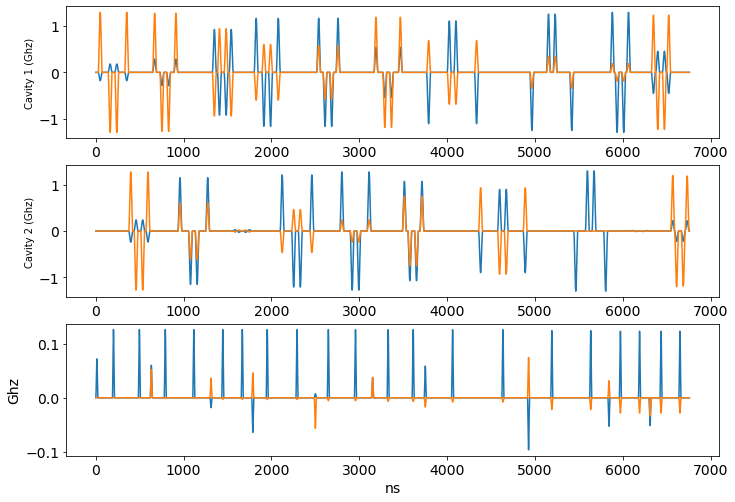

In [67]:
#plotting the pulse in GHz
fig, axs = plt.subplots(3,1)
axs[0].plot(np.real(cavity1_dac_pulse_GHz))
axs[0].plot(np.imag(cavity1_dac_pulse_GHz))
axs[1].plot(np.real(cavity2_dac_pulse_GHz))
axs[1].plot(np.imag(cavity2_dac_pulse_GHz))
axs[0].set_ylabel('Cavity 1 (Ghz)', fontsize = 10)
axs[1].set_ylabel('Cavity 2 (Ghz)', fontsize = 10)
axs[2].plot(np.real(qubit_dac_pulse_GHz))
axs[2].plot(np.imag(qubit_dac_pulse_GHz))
plt.xlabel('ns')
plt.ylabel('Ghz')

In [68]:
def alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha_ = np.zeros_like(epsilon_array)
    alpha = np.array([complex(0,0) for i in range(len(alpha_))])
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    -1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    - 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [69]:
def alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha_ = np.zeros_like(epsilon_array)
    alpha = np.array([complex(0,0) for i in range(len(alpha_))])
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    + 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [70]:
alpha1 = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity1_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha1_star = alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array =np.conjugate(cavity1_dac_pulse_GHz) , delta=0, alpha_init=0 + 0j)

In [71]:
alpha2 = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity2_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha2_star = alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array =np.conjugate(cavity2_dac_pulse_GHz) , delta=0, alpha_init=0 + 0j)

Text(0, 0.5, 'alpha2')

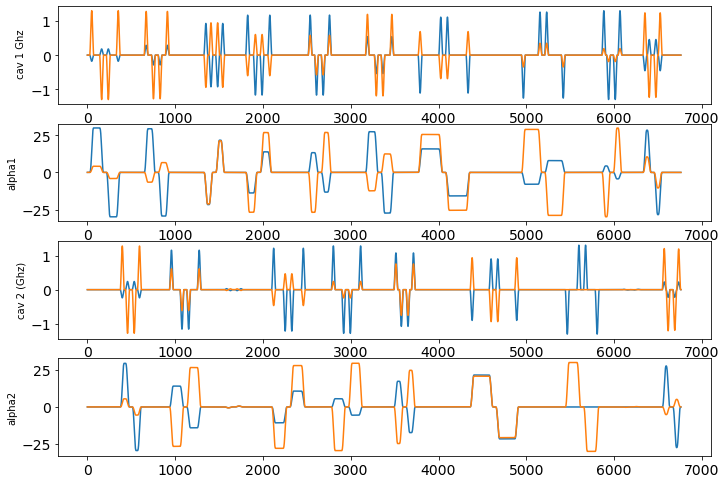

In [72]:
fig, axs = plt.subplots(4,1)
axs[0].plot(np.real(cavity1_dac_pulse_GHz))
axs[0].plot(np.imag(cavity1_dac_pulse_GHz))
axs[0].set_ylabel(' cav 1 Ghz', fontsize = 10)


axs[1].plot(np.real(alpha1))
axs[1].plot(np.imag(alpha1))
axs[1].set_ylabel('alpha1', fontsize = 10)

axs[2].plot(np.real(cavity2_dac_pulse_GHz))
axs[2].plot(np.imag(cavity2_dac_pulse_GHz))
axs[2].set_ylabel('cav 2 (Ghz)', fontsize = 10)

axs[3].plot(np.real(alpha2))
axs[3].plot(np.imag(alpha2))
axs[3].set_ylabel('alpha2', fontsize = 10)

# axs[2].plot(np.real(alpha1_star))
# axs[2].plot(np.imag(alpha1_star))
# axs[2].set_ylabel('alpha1_star', fontsize = 10)
# plt.xlabel('ns')



# axs[2].plot(np.real(alpha2_star))
# axs[2].plot(np.imag(alpha2_star))
# axs[2].set_ylabel('alpha2_star', fontsize = 10)
# plt.xlabel('ns')

# Qutip Simulation

In [73]:
from qutip import *
from qutip.control import *
from math import *

In [74]:
T = len(cavity1_dac_pulse)
times = np.linspace(0, T, T) #1ns timesteps

In [75]:
n_c1 = N1  #number of levels in cavity
n_c2 = N2  #number of levels in cavity
n_q = 2 #number of levels in qubit

#N = 1 #target cavity state

omega_c1  = 5.26 *2*pi   #frequencies in GHz
omega_c2 = 5.26 *2*pi   #frequencies in GHz
omega_q = 6.65*2*pi
#K = -3.7*(10**(-6))*2*pi #cavity nonlinearity

#photon depenedent number shifts
chi1 = storage1_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi1_ = storage1_params["chi_prime_Hz"]*(10**(-9)) #quadratic
chi2 = storage2_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi2_ = storage2_params["chi_prime_Hz"]*(10**(-9)) #quadratic

##mode to mode coupling 
eta = 0#10**(-6)

Assuming both modes have same number of levels

In [76]:
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c1)

a_q = destroy(n_q)
a_c = destroy(n_c1)

adag_q = create(n_q)
adag_c = create(n_c2)

num_q = num(n_q)
num_c =  num(n_c1)


c_ops = []

tlist = times




In [77]:
# Displace Frame hammy
H0_disp = ((chi1/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi2/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE

In [78]:
#for time dep hammy
def mult(a,b):
    '''
    Elementwise multiplication of two lists
    '''
    if len(a) != len(b):
        print('Error with mult: lists must be of same length')
        return []
    return [a[i]*b[i] for i in range(len(a)) ]
    

In [79]:
a = alpha2
b = alpha2_star

In [80]:
# prepping time depedent hammys
alpha1_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha1])
alpha2_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha2])
alpha1_times_2 = mult(alpha1, alpha2)
alpha1star_times_2 = mult(alpha1_star, alpha2)


H = [H0_disp,
     #Qubit drive
    [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
     [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],
     
     # Desired Displacement term from qubit-mode1 coupling
     [(chi1/2)*tensor(sigmaz(), a_c, identity_c), alpha1_star],  
     [(chi1/2)*tensor(sigmaz(), adag_c, identity_c), alpha1],
     
     # Desired Displacement term from qubit-mode2 coupling
     [(chi2/2)*tensor(sigmaz(),  identity_c, a_c), b],  
     [(chi2/2)*tensor(sigmaz(), identity_c, adag_c), a],
     
     # UnDesired Displacement term from mode-mode coupling (no disp^2)
     
#      [(eta)*tensor(identity_q, a_c, num_c), alpha1_star],  
#      [(eta)*tensor(identity_q, adag_c, num_c), alpha1],
#      [(eta)*tensor(identity_q, num_c, a_c), alpha2_star],  
#      [(eta)*tensor(identity_q, num_c, adag_c), alpha2],
     
#      [(eta)*tensor(identity_q, a_c, a_c), np.conjugate(alpha1_times_2)],  
# #      [(eta)*tensor(identity_q, a_c, adag_c), alpha1star_times_2],
#      [(eta)*tensor(identity_q, adag_c, a_c), np.conjugate(alpha1star_times_2)],  
# #     [(eta)*tensor(identity_q, adag_c, adag_c), alpha1_times_2],
     
     # Undesired alpha^2 terms from frequency and mode-mode displacement
#       [(chi1/2)*tensor(sigmaz(), identity_c, identity_c), alpha1_sq],
#      [(chi2/2)*tensor(sigmaz(), identity_c, identity_c), alpha2_sq],
#      [(eta)*tensor(identity_q, identity_c, num_c), alpha1_sq],
#      [(eta)*tensor(identity_q, identity_c, num_c), alpha2_sq]
     ]

In [81]:
psi0 = initial[0]
opts = Options(store_states=True, store_final_state=True,nsteps = 40000,max_step = 10)
output1 = mesolve(H, psi0 , times, c_ops, [], options =opts)
rho = output1.states[-1]

In [82]:
dot(rho, target[0])

(0.5928282556475987+0j)

In [83]:
psi0 = initial[1]
opts = Options(store_states=True, store_final_state=True,nsteps = 40000,max_step = 10)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
rho = output.states[-1]

In [84]:
dot(rho, target[1])

(0.44137173283698433+0j)

In [52]:
# target_state = tensor(basis(n_q,1), basis(n_c1, 1), basis(n_c2, 0))
# fidelity = rho.overlap(target_state)
# fid = np.sqrt(fidelity.real**2 + fidelity.imag**2)
# print('Fidelity is '+ str(fid))

In [53]:
# target_state = tensor(basis(n_q,0), basis(n_c1, 1), basis(n_c2, 0))
# fidelity = rho.overlap(target_state)
# fid = np.sqrt(fidelity.real**2 + fidelity.imag**2)
# print('Fidelity is '+ str(fid))

In [54]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [55]:
def plot_populations(output, figname):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig = plt.figure(figsize=(10,8))
    probs = []
    times = [k for k in range(len(output.states))]
    max_num_levels = 2 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|e,'+str(i)+',' + str(j)+'>')
            
    plt.xlabel("Time (ns)", fontsize = 14)
    plt.ylabel("Populations", fontsize = 14)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()
    fig.savefig(figname, dpi = 1000)

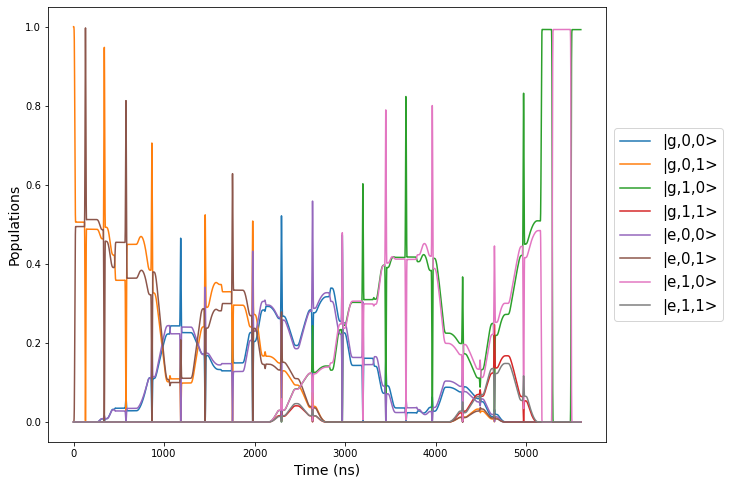

In [56]:
plot_populations(output, 'g00 to g01_eta1Hz.png')